# Aufgabe 2: Regression einer beliebige Funktion

Deine Aufgabe ist es ein neuronales Netz zu bauen, dass eine von Dir definierte mathematische Funktion lernt.
Dein Netz soll als Input einen X-Wert bekommen und dazu den Y-Wert der gelernten mathematischen Funktion berechnen.

### Hinweis
Optimiere das Lernen (`model.fit`) durch das Setzen des Parameters `batch_size` auf die Anzahl der X-Werte.
Damit jupyter notebook sich beim Lernen nicht aufhängt, setze auch zusätzlich den Paramter `verbose=0`.

### Importiere Bibliotheken

In [2]:
# Plots sollen inline im notebook angezeigt werden
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Für Bitcoinkurs
import ai.keras.codefestutils

# Zusätzlich benötigen wir hier noch eine Interpolationsfunktion
from scipy.interpolate import interp1d

#### Definiere Eingabe und erwartete Ausgabe

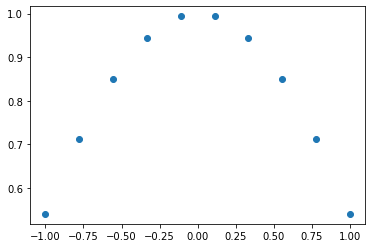

In [66]:
# Definiere beliebige Funktion im Bereich zwischen -1 < x < 1 und 0 < y < 1

m = 10  # Anzahl der Stützpunkte
n = 3 # Grad des Polynoms

X = torch.linspace(-1, 1, steps=m, dtype=torch.float32)
# f = lambda x: x**2
f = torch.cos
Y = f(X)

plt.plot(X, Y, 'o')
plt.show()

# Falls Du die Bitcoin-Kurse als Funktion haben möchtest, dann kommentier die nächste Zeile ein.
# X, Y = codefestutils.GetBitcoinIndex()

#### Berechne w direkt und vergleiche

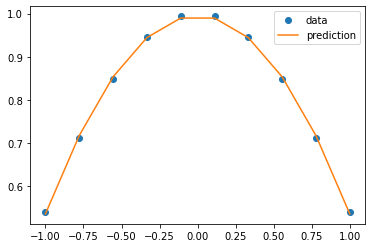

In [67]:
aux = [X.pow(k)  for k in range(n + 1)]
XX = torch.cat(aux, 0).reshape(n + 1, m).t()   # shape = m x (n+1)
YY = Y.reshape(m, 1)      # shape = m x 1

u = YY.t().mm(XX)
v = XX.t().mm(XX).inverse()
w = u.mm(v)
YY_test = XX.mm(w.t())

plt.plot(XX[:, 1], YY[:, 0], 'o', XX[:, 1], YY_test[:, 0], '-')
plt.legend(['data', 'prediction'], loc='best')
plt.show()

#### Definiere das Modell

In [72]:
G = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())
optimizer = optim.SGD(G.parameters(), lr=0.001)
loss = nn.MSELoss()

#### Suche die Lösung

In [73]:
cnt = 0
history = []

X1 = X.reshape(m, 1)
Y1 = Y.reshape(m, 1)

while cnt < 101:
    currentLoss = loss(G(X1), Y1)
    if cnt % 10 == 0:
        history.append(currentLoss.item())
    currentLoss.backward()
    optimizer.step()
    optimizer.zero_grad()
    cnt += 1

### Testphase

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
tensor([0.5919, 0.5397, 0.4866, 0.4339, 0.3826, 0.3338, 0.2883, 0.2467, 0.2093,
        0.1763], grad_fn=<SelectBackward>)


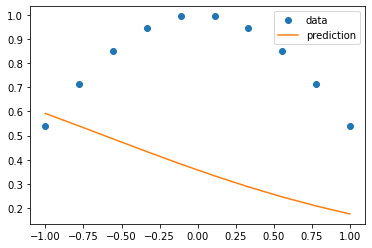

In [74]:
Y_test = G(X1)

print(X1[:, 0])
print(Y_test[:, 0])

plt.plot(X, Y, 'o', list(X1[:, 0]), list(Y_test[:, 0]), '-')
plt.legend(['data', 'prediction'], loc='best')
plt.show()

### Fehlerfunktion

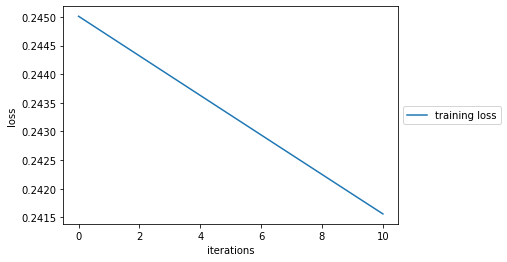

In [75]:
# history output
plt.plot(history, label='training loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()